# Data classification

In [5]:
!pip install geopandas rtree pysal --quiet
import geopandas as gpd
import pandas as pd
import rtree
from shapely.geometry import Polygon
import os
import pysal # PySAL: python Spatial Analysis Library
import mapclassify as mc
import matplotlib.pyplot as plt
os.chdir('/content/drive/MyDrive/shared/2022-ssc-case-comp/ssc22-case-comp/sonny_dir/')
print(os.getcwd())

/content/drive/MyDrive/shared/2022-ssc-case-comp/ssc22-case-comp/sonny_dir


In [2]:
# Load data
province = 'Alberta'
file_path = '../../dataset/'+province + '/' + province + '-speed-tiles.shp'
print(file_path)
data = gpd.read_file(file_path)
data.head(5)

../../dataset/Alberta/Alberta-speed-tiles.shp


,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,year,quarter,conn_type,PRUID,...,CDUID,CDNAME,DAUID,SACTYPE,DA_POP,PCUID,PCNAME,PCTYPE,PCCLASS,geometry
0,0210303330011222,8339,10131,43,1,1,2019,Q1,fixed,48,...,4817,Division No. 17,48170204,6,135.0,None,None,None,None,"POLYGON ((4750150.019 2852254.448, 4750429.052..."
1,0210312023201010,3063,3104,45,1,1,2019,Q1,fixed,48,...,4817,Division No. 17,48170204,6,135.0,None,None,None,None,"POLYGON ((4819998.448 2876845.606, 4820275.358..."
2,0210312023201131,1072,1154,52,2,1,2019,Q1,fixed,48,...,4817,Division No. 17,48170204,6,135.0,None,None,None,None,"POLYGON ((4821145.368 2875696.999, 4821422.377..."
3,0210312032031301,1000,1240,47,2,1,2019,Q1,fixed,48,...,4817,Division No. 17,48170204,6,135.0,None,None,None,None,"POLYGON ((4844419.943 2870361.700, 4844697.412..."
4,0210312032303210,705,1202,47,1,1,2019,Q1,fixed,48,...,4817,Division No. 17,48170204,6,135.0,None,None,None,None,"POLYGON ((4845227.538 2862184.082, 4845505.714..."


In [3]:
# check if we have the right province data
print(data['PRNAME'].unique())
print(data.shape)
print(data.columns)

['Alberta']
(370166, 21)
Index(['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'year', 'quarter', 'conn_type', 'PRUID', 'PRNAME', 'CDUID', 'CDNAME',
       'DAUID', 'SACTYPE', 'DA_POP', 'PCUID', 'PCNAME', 'PCTYPE', 'PCCLASS',
       'geometry'],
      dtype='object')


In [25]:
# Here, we try different classification methods
# First is 'Natural Breaks classifier' from the pysal module.

# define the number of classes
n_classes = 9

# classify the data by 'avg_d_mbps'
data['avg_d_mbps'] = data['avg_d_kbps'] / 1000
cls = mc.NaturalBreaks(data['avg_d_mbps'], k=n_classes)
cls

NaturalBreaks            

    Interval        Count
-------------------------
[  0.00,  27.17] | 143876
( 27.17,  62.70] |  56147
( 62.70, 104.18] |  46759
(104.18, 148.13] |  45377
(148.13, 198.05] |  36756
(198.05, 260.56] |  23168
(260.56, 342.59] |  12482
(342.59, 467.50] |   4235
(467.50, 939.25] |   1366

In [26]:
data2 = data.copy()
classifications = data2[['avg_d_mbps']].apply(cls) 
# putting extra brackets makes the output a pd.DataFrame
classifications.head(10)

,avg_d_mbps
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [19]:
# change the column name and attach it to the original data.
classifications.columns = ['NB_d_class']
data2 = data2.join(classifications)
data2.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,year,quarter,conn_type,PRUID,...,DAUID,SACTYPE,DA_POP,PCUID,PCNAME,PCTYPE,PCCLASS,geometry,avg_d_mbps,NB_d_class
0,0210303330011222,8339,10131,43,1,1,2019,Q1,fixed,48,...,48170204,6,135.0,None,None,None,None,"POLYGON ((4750150.019 2852254.448, 4750429.052...",8.339,0
1,0210312023201010,3063,3104,45,1,1,2019,Q1,fixed,48,...,48170204,6,135.0,None,None,None,None,"POLYGON ((4819998.448 2876845.606, 4820275.358...",3.063,0
2,0210312023201131,1072,1154,52,2,1,2019,Q1,fixed,48,...,48170204,6,135.0,None,None,None,None,"POLYGON ((4821145.368 2875696.999, 4821422.377...",1.072,0
3,0210312032031301,1000,1240,47,2,1,2019,Q1,fixed,48,...,48170204,6,135.0,None,None,None,None,"POLYGON ((4844419.943 2870361.700, 4844697.412...",1.000,0
4,0210312032303210,705,1202,47,1,1,2019,Q1,fixed,48,...,48170204,6,135.0,None,None,None,None,"POLYGON ((4845227.538 2862184.082, 4845505.714...",0.705,0


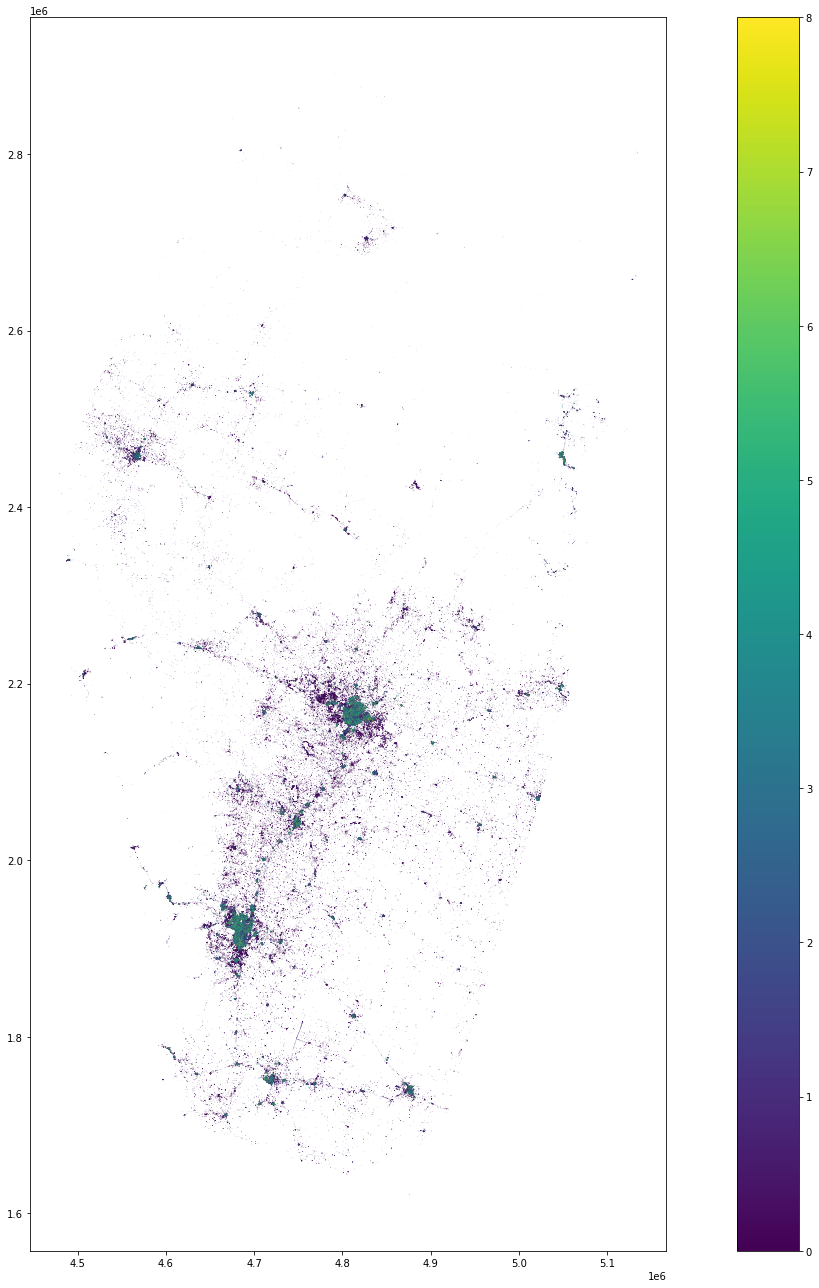

In [23]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [18,15]
data2.plot(column = 'NB_d_class', linewidth=0, legend=True) 
plt.tight_layout()

In [ ]:
# The plot looks too sparse compare to the one on the tutorial file. Why?